/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.5262 - loss: 1.3429 - val_accuracy: 0.7125 - val_loss: 1.0271
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6511 - loss: 1.0831 - val_accuracy: 0.7750 - val_loss: 0.9083
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7194 - loss: 0.9593 - val_accuracy: 0.8250 - val_loss: 0.8471
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8097 - loss: 0.8959 - val_accuracy: 0.8625 - val_loss: 0.8035
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8212 - loss: 0.8637 - val_accuracy: 0.8813 - val_loss: 0.7745
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8344 - loss: 0.8083 - val_accuracy: 0.9000 - val_loss: 0.7494
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8259 - loss: 0.8208 - val_accuracy: 0.9000 - val_loss: 0.7308
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8425 - loss: 0.8056 - val_accuracy: 0.9125 - 

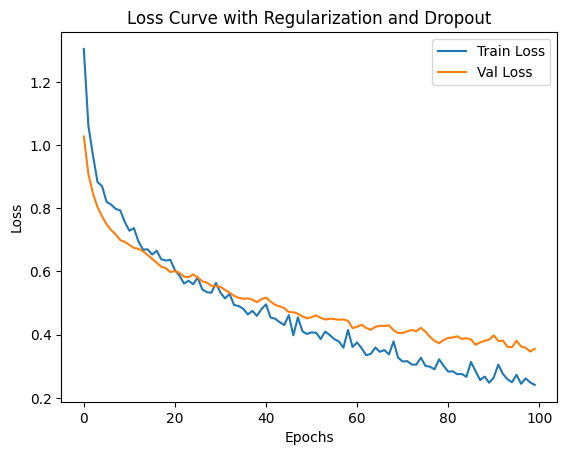

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Generate synthetic binary classification data
X, y = make_classification(n_samples=1000, n_features=20,
                           n_informative=15, n_redundant=5,
                           random_state=42)

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = Sequential([
    Dense(128, activation='relu', kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.001), input_shape=(X.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu', kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu', kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.2),

    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss=BinaryCrossentropy(),
              metrics=['accuracy'])

# Early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[early_stop],
                    verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\n✅ Test Accuracy: {accuracy:.4f}")

# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss Curve with Regularization and Dropout")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [2]:
# 📘 1. Basics of Neural Networks
# What is a Neural Network? – No code required

# Perceptron Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

# Dummy data for Perceptron (AND logic)
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0, 0, 0, 1])

model = Sequential([Dense(1, input_shape=(2,), activation='sigmoid')])
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X, y, epochs=100)

# Multi-layer Perceptron (MLP)
model_mlp = Sequential([
    Dense(4, input_shape=(2,), activation='relu'),
    Dense(1, activation='sigmoid')
])
model_mlp.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_mlp.fit(X, y, epochs=100)

# 🧮 3. Forward Propagation – Shown above through model execution

# 🔁 4. Activation Functions
from tensorflow.keras.layers import Activation, LeakyReLU

# Different activation usage in Keras
activation_model = Sequential([
    Dense(4, input_shape=(2,)),
    Activation('tanh'),
    Dense(1),
    Activation('sigmoid')
])

# Leaky ReLU / PReLU
from tensorflow.keras.layers import PReLU
leaky_relu_model = Sequential([
    Dense(4, input_shape=(2,)),
    LeakyReLU(alpha=0.1),
    Dense(1, activation='sigmoid')
])

# ELU, Swish (advanced)
from tensorflow.keras.activations import elu, swish

# Use custom activation
custom_model = Sequential([
    Dense(4, input_shape=(2,), activation=swish),
    Dense(1, activation='sigmoid')
])

# 📉 5. Loss Functions
# Already shown with binary_crossentropy, use categorical_crossentropy or mse similarly

# 🧠 6. Backpropagation – Handled internally by Keras

# 🚀 7. Optimization Algorithms
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

opt_model = Sequential([
    Dense(4, input_shape=(2,), activation='relu'),
    Dense(1, activation='sigmoid')
])
opt_model.compile(optimizer=RMSprop(), loss='binary_crossentropy', metrics=['accuracy'])

# 🧩 8. Weight Initialization
from tensorflow.keras.initializers import RandomNormal, HeNormal, GlorotUniform

init_model = Sequential([
    Dense(4, input_shape=(2,), activation='relu', kernel_initializer=HeNormal()),
    Dense(1, activation='sigmoid', kernel_initializer=GlorotUniform())
])

# 🎯 9. Regularization Techniques
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.layers import Dropout

reg_model = Sequential([
    Dense(4, input_shape=(2,), activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# 📊 10. Normalization
from tensorflow.keras.layers import BatchNormalization

norm_model = Sequential([
    Dense(4, input_shape=(2,)),
    BatchNormalization(),
    Activation('relu'),
    Dense(1, activation='sigmoid')
])

# 🧪 11. Training Techniques
# Already using Train/Test in fit().

# 🔍 12. Evaluation Metrics
# accuracy, precision, recall, f1 – use sklearn
from sklearn.metrics import classification_report, confusion_matrix

# After prediction
# preds = model.predict(X)
# print(confusion_matrix(y, preds.round()))

# 🛠️ 13. Practical Techniques
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [
    EarlyStopping(patience=5, monitor='val_loss'),
    ModelCheckpoint('best_model.h5', save_best_only=True)
]
model.fit(X, y, epochs=100, validation_split=0.2, callbacks=callbacks)

# 🧰 14. Frameworks & Implementation
# NumPy implementation would be manual – not shown here
# TensorFlow and Keras used above

# 🧠 15. Advanced Concepts
# Autoencoders
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

input_layer = Input(shape=(32,))
encoded = Dense(16, activation='relu')(input_layer)
decoded = Dense(32, activation='sigmoid')(encoded)
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Transfer Learning using pretrained dense layers – typically using larger models, not shown here

# 📦 Bonus: Real Estate Price Prediction (Regression)
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1)

model_reg = Sequential([
    Dense(64, activation='relu', input_shape=(10,)),
    Dense(1)
])
model_reg.compile(optimizer='adam', loss='mse')
model_reg.fit(X, y, epochs=50, batch_size=32)

# Similarly for binary classification (spam), sentiment analysis, etc.
# You can extend this template for MNIST and other datasets using keras.datasets


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step - accuracy: 0.5000 - loss: 0.7546
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.5000 - loss: 0.7529
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.5000 - loss: 0.7513
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.5000 - loss: 0.7497
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.5000 - loss: 0.7482
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.5000 - loss: 0.7466
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.5000 - loss: 0.7450
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5000 - loss: 0.7435
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.5000 - loss: 0.7419
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5000 - loss: 0.7404
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5000 - loss: 0.7388
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5000 - 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6667 - loss: 0.7027

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step - accuracy: 0.6667 - loss: 0.7027 - val_accuracy: 1.0000 - val_loss: 0.4301
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step - accuracy: 0.6667 - loss: 0.6996 - val_accuracy: 1.0000 - val_loss: 0.4331
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.6667 - loss: 0.6965 - val_accuracy: 1.0000 - val_loss: 0.4361
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.6667 - loss: 0.6934 - val_accuracy: 1.0000 - val_loss: 0.4391
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.6667 - loss: 0.6904 - val_accuracy: 1.0000 - val_loss: 0.4421
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.6667 - loss: 0.6873 - val_accuracy: 1.0000 - val_loss: 0.4451
Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 19341.3691
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 19717.4727
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 19414.1973
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/

### perceptorn

In [3]:
import numpy as np

class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._step_function
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # Initialize weights and bias
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Training loop
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_pred = self.activation_func(linear_output)

                # Perceptron weight update rule
                update = self.lr * (y[idx] - y_pred)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.activation_func(linear_output)

    def _step_function(self, x):
        return np.where(x >= 0, 1, 0)

# Example: AND gate
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])  # Output of AND gate

p = Perceptron(learning_rate=0.1, n_iters=10)
p.fit(X, y)

print("Predictions:", p.predict(X))


Predictions: [0 0 0 1]


In [4]:
from sklearn.linear_model import Perceptron
import numpy as np

# Define input features (AND gate)
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

# Output labels (AND gate output)
y = np.array([0, 0, 0, 1])

# Initialize and train the Perceptron model
model = Perceptron(max_iter=1000, eta0=0.1, random_state=42)

# Fit model to the data
model.fit(X, y)

# Predict on the same inputs
predictions = model.predict(X)

# Display predictions
print("Predictions:", predictions)
print("Weights:", model.coef_)
print("Bias (intercept):", model.intercept_)


Predictions: [0 0 0 1]
Weights: [[0.2 0.2]]
Bias (intercept): [-0.2]


In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Input data (AND gate)
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

# Labels
y = np.array([0, 0, 0, 1])

# Build the model
model = Sequential()

# Add a single dense layer with 1 neuron (this acts like a perceptron)
# Use 'sigmoid' activation for binary classification
model.add(Dense(1, input_dim=2, activation='sigmoid'))

# Compile the model
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=100, verbose=0)

# Evaluate performance
loss, accuracy = model.evaluate(X, y, verbose=0)
print("Accuracy:", accuracy)

# Predict
predictions = model.predict(X)
predicted_labels = (predictions > 0.5).astype(int)

print("Predictions (probabilities):", predictions.ravel())
print("Predicted Classes:", predicted_labels.ravel())


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Accuracy: 0.5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
Predictions (probabilities): [0.4444597  0.17893639 0.7435657  0.441296  ]
Predicted Classes: [0 0 1 0]


# Perceptron Trick | How to train a Perceptron | Perceptron Part 2 |


In [6]:
import numpy as np

class Perceptron:
    def __init__(self, learning_rate=0.1, n_iters=100):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation = self._step_function  # Binary activation function
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initialize weights and bias to zero
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Training loop
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_pred = self.activation(linear_output)

                # Perceptron trick (update rule)
                update = self.lr * (y[idx] - y_pred)

                # Update weights and bias
                self.weights += update * x_i
                self.bias += update

                # Debugging/understanding step
                print(f"Update: {update}, Weights: {self.weights}, Bias: {self.bias}")

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.activation(linear_output)

    def _step_function(self, x):
        return np.where(x >= 0, 1, 0)

# AND gate example
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y = np.array([0, 0, 0, 1])  # Output of AND

# Create and train model
p = Perceptron(learning_rate=0.1, n_iters=10)
p.fit(X, y)

# Predict on training data
print("Final Predictions:", p.predict(X))


Update: -0.1, Weights: [0. 0.], Bias: -0.1
Update: 0.0, Weights: [0. 0.], Bias: -0.1
Update: 0.0, Weights: [0. 0.], Bias: -0.1
Update: 0.1, Weights: [0.1 0.1], Bias: 0.0
Update: -0.1, Weights: [0.1 0.1], Bias: -0.1
Update: -0.1, Weights: [0.1 0. ], Bias: -0.2
Update: 0.0, Weights: [0.1 0. ], Bias: -0.2
Update: 0.1, Weights: [0.2 0.1], Bias: -0.1
Update: 0.0, Weights: [0.2 0.1], Bias: -0.1
Update: -0.1, Weights: [0.2 0. ], Bias: -0.2
Update: -0.1, Weights: [0.1 0. ], Bias: -0.30000000000000004
Update: 0.1, Weights: [0.2 0.1], Bias: -0.20000000000000004
Update: 0.0, Weights: [0.2 0.1], Bias: -0.20000000000000004
Update: 0.0, Weights: [0.2 0.1], Bias: -0.20000000000000004
Update: 0.0, Weights: [0.2 0.1], Bias: -0.20000000000000004
Update: 0.0, Weights: [0.2 0.1], Bias: -0.20000000000000004
Update: 0.0, Weights: [0.2 0.1], Bias: -0.20000000000000004
Update: 0.0, Weights: [0.2 0.1], Bias: -0.20000000000000004
Update: 0.0, Weights: [0.2 0.1], Bias: -0.20000000000000004
Update: 0.0, Weights: 

In [7]:
from sklearn.linear_model import Perceptron
import numpy as np

# Sample data - AND gate
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y = np.array([0, 0, 0, 1])

# Create a perceptron model
model = Perceptron(max_iter=10, eta0=0.1, random_state=42)

# Train the model
model.fit(X, y)

# Predict
predictions = model.predict(X)

print("Predictions:", predictions)
print("Weights:", model.coef_)
print("Bias (intercept):", model.intercept_)


Predictions: [0 0 0 1]
Weights: [[0.2 0.2]]
Bias (intercept): [-0.2]


In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# AND gate input
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

# AND gate output
y = np.array([0, 0, 0, 1])

# Create a model: 1 dense layer, 1 neuron, sigmoid activation
model = Sequential()
model.add(Dense(1, input_dim=2, activation='sigmoid'))

# Compile model with binary cross-entropy
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train model
model.fit(X, y, epochs=100, verbose=0)

# Evaluate
loss, acc = model.evaluate(X, y, verbose=0)
print(f"Accuracy: {acc:.2f}")

# Predict
predictions = model.predict(X)
predicted_classes = (predictions > 0.5).astype(int)

print("Predictions (Probabilities):", predictions.ravel())
print("Predicted Classes:", predicted_classes.ravel())
print("Weights:", model.layers[0].get_weights()[0])
print("Bias:", model.layers[0].get_weights()[1])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Accuracy: 0.75
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
Predictions (Probabilities): [0.21218036 0.45307463 0.20346911 0.43999687]
Predicted Classes: [0 0 0 0]
Weights: [[-0.05291929]
 [ 1.123577  ]]
Bias: [-1.3118325]


# Perceptron Loss Function | Hinge Loss | Binary Cross Entropy | Sigmoid Function

🔹 Sigmoid + Binary Crossentropy Loss

🔹 Hinge Loss with appropriate activation

✅ 1. Binary Crossentropy Loss with Sigmoid Activation


In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Input (AND gate)
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0, 0, 0, 1])  # Binary labels

# Build model with sigmoid activation
model = Sequential()
model.add(Dense(1, input_dim=2, activation='sigmoid'))

# Compile with binary crossentropy loss
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
model.fit(X, y, epochs=100, verbose=0)

# Predict
preds = model.predict(X)
print("Binary Crossentropy Predictions:", (preds > 0.5).astype(int).ravel())


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Binary Crossentropy Predictions: [0 1 0 0]


✅ 2. Hinge Loss with Tanh Activation

Hinge loss requires labels as -1 or +1, and a linear or tanh activation.

In [10]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Input
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([-1, -1, -1, 1])  # Labels for hinge loss must be -1 or 1

# Build model using tanh activation (outputs between -1 and 1)
model = Sequential()
model.add(Dense(1, input_dim=2, activation='tanh'))

# Compile with hinge loss
model.compile(optimizer='sgd', loss='hinge', metrics=['accuracy'])

# Train model
model.fit(X, y, epochs=100, verbose=0)

# Predict
preds = model.predict(X)
print("Hinge Loss Raw Outputs:", preds.ravel())
print("Predicted Labels:", np.where(preds >= 0, 1, -1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Hinge Loss Raw Outputs: [-0.16781399  0.78890836 -0.8299717   0.04986399]
Predicted Labels: [[-1]
 [ 1]
 [-1]
 [ 1]]


# Multi Layer Perceptron

In [11]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Sample binary classification data (AND gate)
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0, 0, 0, 1])

# Build Multi-Layer Perceptron
model = Sequential()
model.add(Dense(4, input_dim=2, activation='relu'))  # Hidden layer
model.add(Dense(1, activation='sigmoid'))            # Output layer

# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
model.fit(X, y, epochs=200, verbose=0)

# Predict
predictions = model.predict(X)
print("Predicted Classes:", (predictions > 0.5).astype(int).ravel())


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Predicted Classes: [0 0 0 0]


# Forward Propagation | How a neural network predicts output?

In [12]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Input data (e.g., XOR)
X = np.array([[0,0], [0,1], [1,0], [1,1]])

# Build a simple feedforward neural network (forward propagation)
model = Sequential()
model.add(Dense(4, input_dim=2, activation='relu'))  # Hidden layer
model.add(Dense(1, activation='sigmoid'))            # Output layer

# Compile model (required before predict)
model.compile(optimizer='adam', loss='binary_crossentropy')

# Forward pass (no training, just output calculation)
outputs = model(X)  # Forward propagate inputs through network
print("Forward Propagation Outputs:", outputs.numpy().ravel())


Forward Propagation Outputs: [0.5       0.5435624 0.5       0.5017875]


# Loss Functions in Deep Learning

In [13]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

X = np.array([[0,0],[0,1],[1,0],[1,1]])
y_binary = np.array([0, 1, 1, 0])        # For binary loss
y_categorical = tf.keras.utils.to_categorical([0, 1, 1, 0], num_classes=2)  # For categorical loss

# Binary Crossentropy
model_bce = Sequential()
model_bce.add(Dense(4, input_dim=2, activation='relu'))
model_bce.add(Dense(1, activation='sigmoid'))
model_bce.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_bce.fit(X, y_binary, epochs=100, verbose=0)
print("Binary Crossentropy:", model_bce.evaluate(X, y_binary, verbose=0))

# Categorical Crossentropy
model_cce = Sequential()
model_cce.add(Dense(4, input_dim=2, activation='relu'))
model_cce.add(Dense(2, activation='softmax'))
model_cce.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_cce.fit(X, y_categorical, epochs=100, verbose=0)
print("Categorical Crossentropy:", model_cce.evaluate(X, y_categorical, verbose=0))

# Mean Squared Error (MSE)
model_mse = Sequential()
model_mse.add(Dense(4, input_dim=2, activation='relu'))
model_mse.add(Dense(1))
model_mse.compile(optimizer='adam', loss='mse', metrics=['mae'])
model_mse.fit(X, y_binary, epochs=100, verbose=0)
print("Mean Squared Error:", model_mse.evaluate(X, y_binary, verbose=0))

# Hinge Loss
y_hinge = np.array([-1, 1, 1, -1])  # for hinge loss
model_hinge = Sequential()
model_hinge.add(Dense(4, input_dim=2, activation='tanh'))
model_hinge.add(Dense(1, activation='tanh'))
model_hinge.compile(optimizer='adam', loss='hinge', metrics=['accuracy'])
model_hinge.fit(X, y_hinge, epochs=100, verbose=0)
print("Hinge Loss:", model_hinge.evaluate(X, y_hinge, verbose=0))


Binary Crossentropy: [0.6771039366722107, 0.75]
Categorical Crossentropy: [0.682645320892334, 0.75]
Mean Squared Error: [0.24641171097755432, 0.4603637456893921]
Hinge Loss: [0.9844048023223877, 0.0]


# Backpropagation in Deep Learning

In [14]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Sample XOR data
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[0], [1], [1], [0]])

# Define a simple neural network
model = Sequential([
    Dense(4, input_dim=2, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with binary crossentropy loss and Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model (backpropagation happens here)
history = model.fit(X, y, epochs=200, verbose=0)

# Final evaluation
loss, acc = model.evaluate(X, y, verbose=0)
print(f"Final Loss: {loss:.4f}, Accuracy: {acc:.4f}")


Final Loss: 0.6273, Accuracy: 0.7500


# MLP Memoization

✅ Example: Memoizing Predictions in MLP Using Python Dictionary



In [15]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Dataset
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[0], [1], [1], [0]])

# Define and train the MLP
model = Sequential([
    Dense(8, input_dim=2, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X, y, epochs=100, verbose=0)

# Prediction Memoization
prediction_cache = {}

def predict_with_cache(input_data):
    key = tuple(input_data)
    if key in prediction_cache:
        print("From Cache")
        return prediction_cache[key]
    else:
        prediction = model.predict(np.array([input_data]), verbose=0)[0][0]
        prediction_cache[key] = prediction
        print("From Model")
        return prediction

# Test predictions with memoization
print(predict_with_cache([0, 1]))
print(predict_with_cache([0, 1]))  # This should use the cache
print(predict_with_cache([1, 1]))
print(predict_with_cache([1, 1]))  # Cached again


From Model
0.65647143
From Cache
0.65647143
From Model
0.5284958
From Cache
0.5284958


In [16]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# XOR Data
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[0], [1], [1], [0]])



model = Sequential([
    Dense(8, input_dim=2, activation='relu'),
    Dense(1, activation='sigmoid')
])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


🔹 1. Batch Gradient Descent

In [17]:
model_batch = model
model_batch.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
                    loss='binary_crossentropy', metrics=['accuracy'])

# batch_size = full dataset (4)
model_batch.fit(X, y, epochs=200, batch_size=4, verbose=0)
print("Batch Gradient Descent Evaluation:")
print(model_batch.evaluate(X, y, verbose=0))


Batch Gradient Descent Evaluation:
[0.2229798138141632, 1.0]


🔹 2. Stochastic Gradient Descent (SGD)

In [19]:
model_sgd = model
model_sgd.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
                  loss='binary_crossentropy', metrics=['accuracy'])

# batch_size = 1 (pure stochastic)
model_sgd.fit(X, y, epochs=200, batch_size=1, verbose=0)
print("Stochastic Gradient Descent Evaluation:")
print(model_sgd.evaluate(X, y, verbose=0))


Stochastic Gradient Descent Evaluation:
[0.023348242044448853, 1.0]


🔹 3. Mini-Batch Gradient Descent

In [20]:
model_minibatch = model
model_minibatch.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
                        loss='binary_crossentropy', metrics=['accuracy'])

# batch_size = 2 (mini-batch)
model_minibatch.fit(X, y, epochs=200, batch_size=2, verbose=0)
print("Mini-Batch Gradient Descent Evaluation:")
print(model_minibatch.evaluate(X, y, verbose=0))


Mini-Batch Gradient Descent Evaluation:
[0.015155991539359093, 1.0]


# Vanishing Gradient Problem in ANN | Exploding Gradient Problem | Code Example

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

# Dummy data
X = np.random.rand(1000, 10)
y = np.random.randint(0, 2, size=(1000, 1))

# Deep network
def build_model(weight_initializer):
    model = Sequential()
    model.add(Dense(128, input_shape=(10,), activation='relu', kernel_initializer=weight_initializer))
    for _ in range(10):  # Very deep network to simulate gradient problems
        model.add(Dense(128, activation='relu', kernel_initializer=weight_initializer))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy')
    return model


🔹 1. Vanishing Gradient Problem

In [22]:
print("Training with glorot_uniform (may vanish gradients)")
model_vanish = build_model('glorot_uniform')
model_vanish.fit(X, y, epochs=10, verbose=1)


Training with glorot_uniform (may vanish gradients)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.6926
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.6921
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.6901
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6912
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6883
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6912
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6854
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6808
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6808
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6742


🔹 2. Exploding Gradient Problem

In [23]:
from tensorflow.keras.initializers import RandomNormal

print("Training with random_normal stddev=5 (may explode gradients)")
exploding_init = RandomNormal(mean=0.0, stddev=5.0)
model_explode = build_model(exploding_init)
model_explode.fit(X, y, epochs=10, verbose=1)


Training with random_normal stddev=5 (may explode gradients)
Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 23084049056661504.0000
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3379453140926464.0000
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1984876723044352.0000
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1461749974827008.0000
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1356124783640576.0000
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 967768539136000.0000
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 822194582061056.0000
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 710900638023680.0000
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 754263500259328.0000
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 680780032376832.0000


# Early Stopping In Neural Networks

In [24]:
import tensorflow as tf
import numpy as np

# Sample data
X = np.random.rand(1000, 10)
y = np.random.randint(0, 2, size=(1000, 1))

# Define model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# EarlyStopping callback
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',       # what to monitor
    patience=3,               # how many epochs to wait
    restore_best_weights=True
)

# Train with EarlyStopping
model.fit(X, y,
          validation_split=0.2,
          epochs=100,
          batch_size=32,
          callbacks=[early_stop],
          verbose=1)


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4861 - loss: 0.6987 - val_accuracy: 0.5050 - val_loss: 0.6969
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5143 - loss: 0.6929 - val_accuracy: 0.4900 - val_loss: 0.6966
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5258 - loss: 0.6908 - val_accuracy: 0.5000 - val_loss: 0.6935
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5208 - loss: 0.6915 - val_accuracy: 0.4700 - val_loss: 0.6951
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5277 - loss: 0.6872 - val_accuracy: 0.4800 - val_loss: 0.6967
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5499 - loss: 0.6849 - val_accuracy: 0.4850 - val_loss: 0.6947


# ✅ Feature Scaling in Neural Networks (StandardScaler)

In [25]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Generate dummy data
X = np.random.rand(1000, 10) * 100  # unscaled features
y = np.random.randint(0, 2, size=(1000, 1))  # binary classification

# Apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define ANN model
model = Sequential([
    Dense(64, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
model.fit(X_scaled, y, epochs=20, batch_size=32, validation_split=0.2)


# 🔁 You can also try MinMaxScaler() if your activation is sigmoid or data range matters.

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.5221 - loss: 0.6957 - val_accuracy: 0.4700 - val_loss: 0.7082
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5420 - loss: 0.6922 - val_accuracy: 0.5000 - val_loss: 0.7044
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5953 - loss: 0.6763 - val_accuracy: 0.5300 - val_loss: 0.7021
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5794 - loss: 0.6706 - val_accuracy: 0.5300 - val_loss: 0.7018
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6333 - loss: 0.6659 - val_accuracy: 0.4900 - val_loss: 0.7049
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6093 - loss: 0.6670 - val_accuracy: 0.5050 - val_loss: 0.7030
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6227 - loss: 0.6574 - val_accuracy: 0.5050 - val_loss: 0.7071
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6479 - loss: 0.6503 - val_accuracy: 0.4950 - val_loss: 0.7094
Ep

# Dropout Layers in ANN |  Regression | Classification

✅ Classification Example with Dropout

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import numpy as np

# Sample classification data
X = np.random.rand(1000, 20)
y = np.random.randint(0, 2, size=(1000, 1))

# Model with Dropout
model = Sequential([
    Dense(64, activation='relu', input_shape=(20,)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X, y, epochs=20, batch_size=32, validation_split=0.2)


Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.4803 - loss: 0.7155 - val_accuracy: 0.5000 - val_loss: 0.6917
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5066 - loss: 0.6969 - val_accuracy: 0.4850 - val_loss: 0.6919
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5153 - loss: 0.6962 - val_accuracy: 0.5300 - val_loss: 0.6920
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5371 - loss: 0.6901 - val_accuracy: 0.5150 - val_loss: 0.6921
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5571 - loss: 0.6898 - val_accuracy: 0.5150 - val_loss: 0.6915
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5254 - loss: 0.6917 - val_accuracy: 0.5050 - val_loss: 0.6911
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5779 - loss: 0.6859 - val_accuracy: 0.5100 - val_loss: 0.6908
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5051 - loss: 0.6944 - val_accuracy: 0.5000 - val_loss

✅ Regression Example with Dropout

In [27]:
from sklearn.preprocessing import StandardScaler

# Sample regression data
X = np.random.rand(1000, 10) * 100
y = np.random.rand(1000, 1) * 500

# Scale inputs
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Model for regression
model = Sequential([
    Dense(64, activation='relu', input_shape=(10,)),
    Dropout(0.4),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1)  # No activation for regression
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.fit(X_scaled, y, epochs=20, batch_size=32, validation_split=0.2)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 88015.8750 - mae: 261.0348 - val_loss: 87998.3516 - val_mae: 258.5094
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 85255.6484 - mae: 253.7667 - val_loss: 86812.2031 - val_mae: 256.1976
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 82464.1094 - mae: 246.8874 - val_loss: 84791.1016 - val_mae: 252.2059
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 78601.5469 - mae: 240.8858 - val_loss: 81522.9375 - val_mae: 245.8898
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 77642.2656 - mae: 239.0134 - val_loss: 76658.5547 - val_mae: 236.5915
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 72846.0078 - mae: 227.9276 - val_loss: 70066.0938 - val_mae: 224.0484
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 68801.7812 - mae: 222.8472 - val_loss: 61865.7266 - val_mae: 208.2841
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 57316.6133 - mae: 198.4286 - val_loss: 52797.6016 - val_

# Regularization in Deep Learning | L2 Regularization in ANN | L1 Regularization | Weight Decay in ANN


✅ L2 Regularization (Weight Decay)

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2
import numpy as np

# Sample data
X = np.random.rand(1000, 20)
y = np.random.randint(0, 2, size=(1000, 1))

# Model with L2 regularization
model = Sequential([
    Dense(64, activation='relu', kernel_regularizer=l2(0.01), input_shape=(20,)),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X, y, epochs=20, batch_size=32, validation_split=0.2)


Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.4996 - loss: 1.4093 - val_accuracy: 0.4900 - val_loss: 1.2865
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5116 - loss: 1.2500 - val_accuracy: 0.4500 - val_loss: 1.1593
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5463 - loss: 1.1278 - val_accuracy: 0.5100 - val_loss: 1.0558
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5697 - loss: 1.0268 - val_accuracy: 0.4600 - val_loss: 0.9764
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5760 - loss: 0.9523 - val_accuracy: 0.4950 - val_loss: 0.9127
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5738 - loss: 0.8925 - val_accuracy: 0.5050 - val_loss: 0.8642
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5567 - loss: 0.8474 - val_accuracy: 0.4900 - val_loss: 0.8287
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5710 - loss: 0.8132 - val_accuracy: 0.5100 - val_lo

✅ L1 Regularization

In [29]:
from tensorflow.keras.regularizers import l1

model = Sequential([
    Dense(64, activation='relu', kernel_regularizer=l1(0.01), input_shape=(20,)),
    Dense(32, activation='relu', kernel_regularizer=l1(0.01)),
    Dense(1, activation='sigmoid')
])


✅ L1 + L2 Regularization (Elastic Net)

In [30]:
from tensorflow.keras.regularizers import l1_l2

model = Sequential([
    Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=0.005, l2=0.005), input_shape=(20,)),
    Dense(32, activation='relu', kernel_regularizer=l1_l2(l1=0.005, l2=0.005)),
    Dense(1, activation='sigmoid')
])


# Activation Functions in Deep Learning | Sigmoid, Tanh and Relu and Relu Variants Explained | Leaky Relu | Parametric Relu | Elu | Selu

In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, PReLU, ELU
model = Sequential([
    # Input Layer
    Dense(64, activation='sigmoid', input_shape=(20,)),   # Sigmoid Activation

    # Hidden Layers with different activations
    Dense(64, activation='tanh'),                          # Tanh Activation
    Dense(64, activation='relu'),                          # ReLU Activation

    Dense(64), LeakyReLU(alpha=0.1),                       # Leaky ReLU
    Dense(64), PReLU(),                                    # Parametric ReLU (learns alpha)
    Dense(64), ELU(alpha=1.0),                             # ELU
    Dense(64, activation='selu'),                          # SELU (only useful with specific initializers)

    # Output Layer (Binary Classification)
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

import numpy as np

X = np.random.rand(1000, 20)
y = np.random.randint(0, 2, (1000, 1))

model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)



Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.5249 - loss: 0.6950 - val_accuracy: 0.5250 - val_loss: 0.6930
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5159 - loss: 0.6949 - val_accuracy: 0.4800 - val_loss: 0.6956
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5549 - loss: 0.6904 - val_accuracy: 0.4800 - val_loss: 0.6987
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5106 - loss: 0.6976 - val_accuracy: 0.4700 - val_loss: 0.6932
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4901 - loss: 0.6946 - val_accuracy: 0.4800 - val_loss: 0.6946
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4903 - loss: 0.6941 - val_accuracy: 0.4800 - val_loss: 0.6959
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4850 - loss: 0.6953 - val_accuracy: 0.4800 - val_loss: 0.6944
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5004 - loss: 0.6943 - val_accuracy: 0.4800 - val_lo

# Weight Initialization Techniques Xavier/Glorat And He Weight Initialization


In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.initializers import RandomNormal, GlorotUniform, HeNormal
import numpy as np



✅ 2. Xavier/Glorot Initialization (Good for tanh/sigmoid activations)

In [37]:
X = np.random.rand(500, 100)
y = np.random.randint(0, 2, (500, 1))
model_xavier = Sequential([
    Dense(64, input_shape=(100,), kernel_initializer=GlorotUniform(), activation='tanh'),
    Dense(1, activation='sigmoid')
])

model_he.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_he.fit(X, y, epochs=5, batch_size=32)

Epoch 1/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4586 - loss: 0.7292
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5574 - loss: 0.7007 
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5537 - loss: 0.6918
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5925 - loss: 0.6749  
Epoch 5/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5320 - loss: 0.6858 


✅ 3. He Initialization (Best for ReLU/LeakyReLU activations)

In [38]:
X = np.random.rand(500, 100)
y = np.random.randint(0, 2, (500, 1))
model_he = Sequential([
    Dense(64, input_shape=(100,), kernel_initializer=HeNormal(), activation='relu'),
    Dense(1, activation='sigmoid')
])
model_he.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_he.fit(X, y, epochs=5, batch_size=32)


Epoch 1/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5363 - loss: 0.7086
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5124 - loss: 0.7072 
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4794 - loss: 0.7065 
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5693 - loss: 0.6927 
Epoch 5/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5919 - loss: 0.6741 


# Batch Normalization in Deep Learning | Batch Learning in Keras


✅ Batch Normalization for Classification

In [39]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam

# Sample model with Batch Normalization
model = Sequential([
    Dense(128, input_shape=(100,)),
    BatchNormalization(),
    Activation('relu'),

    Dense(64),
    BatchNormalization(),
    Activation('relu'),

    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Dummy Data
import numpy as np
X = np.random.rand(1000, 100)
y = np.random.randint(0, 2, (1000, 1))

model.fit(X, y, epochs=5, batch_size=32)


Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4516 - loss: 0.8506
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6276 - loss: 0.6411
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7219 - loss: 0.5750
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8229 - loss: 0.5055
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8717 - loss: 0.4568


✅ Batch Normalization for Regression

In [40]:
model_reg = Sequential([
    Dense(128, input_shape=(100,)),
    BatchNormalization(),
    Activation('relu'),

    Dense(64),
    BatchNormalization(),
    Activation('relu'),

    Dense(1)  # No activation for regression output
])

model_reg.compile(optimizer='adam', loss='mse')

# Dummy Regression Data
X = np.random.rand(1000, 100)
y = np.random.rand(1000, 1)

model_reg.fit(X, y, epochs=5, batch_size=32)


Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.0010
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2249
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1536
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1033
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0735


# Optimizers in Deep Learning


In [41]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Dummy Data
X = np.random.rand(1000, 20)
y = np.random.randint(0, 2, (1000, 1))


1. SGD (Stochastic Gradient Descent)

In [42]:
model_sgd = Sequential([
    Dense(64, activation='relu', input_shape=(20,)),
    Dense(1, activation='sigmoid')
])

model_sgd.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

model_sgd.fit(X, y, epochs=5, batch_size=32)


Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4886 - loss: 0.7000
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4933 - loss: 0.6965
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4862 - loss: 0.6952
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5465 - loss: 0.6891
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5155 - loss: 0.6973


2. Momentum

In [43]:
model_momentum = Sequential([
    Dense(64, activation='relu', input_shape=(20,)),
    Dense(1, activation='sigmoid')
])

model_momentum.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
                       loss='binary_crossentropy',
                       metrics=['accuracy'])

model_momentum.fit(X, y, epochs=5, batch_size=32)


Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4759 - loss: 0.7081
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5032 - loss: 0.7008
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5083 - loss: 0.6974
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5032 - loss: 0.6990
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5177 - loss: 0.6936


3. RMSprop

In [44]:
model_rmsprop = Sequential([
    Dense(64, activation='relu', input_shape=(20,)),
    Dense(1, activation='sigmoid')
])

model_rmsprop.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

model_rmsprop.fit(X, y, epochs=5, batch_size=32)


Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5000 - loss: 0.7040
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5116 - loss: 0.6938
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5361 - loss: 0.6898
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5491 - loss: 0.6875
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5148 - loss: 0.6885


4. Adam

In [45]:
model_adam = Sequential([
    Dense(64, activation='relu', input_shape=(20,)),
    Dense(1, activation='sigmoid')
])

model_adam.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

model_adam.fit(X, y, epochs=5, batch_size=32)


Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4914 - loss: 0.7053
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5116 - loss: 0.6930
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5101 - loss: 0.6949
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5465 - loss: 0.6877
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5498 - loss: 0.6885


# Exponentially Weighted Moving Average or Exponential Weighted Average

In [46]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

# Dummy data
X = np.random.rand(1000, 10)
y = np.random.randint(0, 2, size=(1000, 1))

# Model
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(1, activation='sigmoid')
])

# Using SGD with momentum (which uses EWMA internally)
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X, y, epochs=5, batch_size=32)


Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4839 - loss: 0.7040
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4819 - loss: 0.7028
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5176 - loss: 0.6941
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5479 - loss: 0.6891
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5337 - loss: 0.6901


# Nesterov Accelerated Gradient (NAG)

In [47]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

# Dummy dataset
X = np.random.rand(1000, 10)
y = np.random.randint(0, 2, size=(1000, 1))

# Build model
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(1, activation='sigmoid')
])

# Compile using SGD with Nesterov
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train
model.fit(X, y, epochs=5, batch_size=32)


Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4714 - loss: 0.7121
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5234 - loss: 0.6918
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5329 - loss: 0.6893
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5476 - loss: 0.6886
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5659 - loss: 0.6832


# AdaGrad

In [48]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

# Dummy dataset
X = np.random.rand(1000, 10)
y = np.random.randint(0, 2, size=(1000, 1))

# Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(10,)),
    Dense(1, activation='sigmoid')
])

# Compile using AdaGrad
optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train
model.fit(X, y, epochs=5, batch_size=32)


Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5148 - loss: 0.6963
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5001 - loss: 0.6951
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5335 - loss: 0.6932
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5215 - loss: 0.6930
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5095 - loss: 0.6943


# Keras Tuner | Hyperparameter Tuning a Neural Network

Keras Tuner with Hyperband

In [50]:
!pip install keras-tuner --upgrade


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.2 MB/s eta 0:00:00


In [52]:
import keras_tuner as kt
import tensorflow as tf
from tensorflow import keras
import numpy as np

# Dummy Data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

# Flatten input
X_train = X_train.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)

# Build Model Function
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Input(shape=(784,)))

    # Tune number of layers
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(keras.layers.Dense(
            units=hp.Int(f'units_{i}', min_value=32, max_value=512, step=32),
            activation=hp.Choice('activation', ['relu', 'tanh'])
        ))

    model.add(keras.layers.Dense(10, activation='softmax'))

    # Compile
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])
        ),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Initialize Tuner
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=10,
    factor=3,
    directory='keras_tuner_dir',
    project_name='mnist_tuning'
)

# Early stopping
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# Search best hyperparameters
tuner.search(X_train, y_train, epochs=20, validation_split=0.2, callbacks=[stop_early])

# Get best model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"Best hyperparameters:")
print(f" - Layers: {best_hps.get('num_layers')}")
print(f" - Activation: {best_hps.get('activation')}")
print(f" - Learning rate: {best_hps.get('learning_rate')}")

# Train best model
model = tuner.hypermodel.build(best_hps)
model.fit(X_train, y_train, epochs=1, validation_split=0.2)


Trial 7 Complete [00h 00m 48s]
val_accuracy: 0.9595833420753479

Best val_accuracy So Far: 0.9698333144187927
Total elapsed time: 00h 04m 38s

Search: Running Trial #8

Value             |Best Value So Far |Hyperparameter
1                 |2                 |num_layers
160               |192               |units_0
relu              |relu              |activation
0.01              |0.001             |learning_rate
480               |32                |units_1
288               |None              |units_2
2                 |2                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
2                 |2                 |tuner/bracket
0                 |0                 |tuner/round

Epoch 1/2
 574/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8430 - loss: 0.5056

KeyboardInterrupt: 